# **NOVA IMS - Information Management School** <br/>
# *Postgraduate Program Enterprise Data Science and Analytics* <br/>
Deep Learning Neural Networks <br/>
TP3 - Group 14 - February 2023<br/>

# **Trabalho Deep learning** <br/>

# 1. Load and import required packages and libraries:

In [ ]:
!pip3 install livelossplot==0.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
from tensorflow.keras import Sequential, Model, Input, layers, initializers, regularizers, optimizers, metrics
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D

from tensorflow.keras.optimizers import schedules

import os
import time
import random 
import zipfile
from shutil import copyfile
from pathlib import Path


import numpy as np
import pandas as pd
import shutil
from PIL import Image

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap
from google.colab import drive

import shutil
from collections import defaultdict
import json
from pathlib import Path
import os

from livelossplot.inputs.keras import PlotLossesCallback
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.metrics import accuracy_score, confusion_matrix
#from tensorflow.keras.applications import ResNet50


In [ ]:
pip freeze > requirements.txt

# 2. Load the data and perform the preprocessing:

In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz 

--2023-02-04 10:20:06--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2023-02-04 10:20:06--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  27.1MB/s    in 3m 12s  

2023-02-04 10:23:18 (24.9 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [ ]:
!tar xzvf food-101.tar.gz

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/695879.jpg
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/

In [ ]:
def split_dataset(root_food_path):
    data_paths = {
        'train': root_food_path/'meta/train.json',
        'test': root_food_path/'meta/test.json'
    }
    for data_type, meta_path in data_paths.items():
        os.makedirs(root_food_path/data_type, exist_ok=True)

        food_images = json.load(open(meta_path, 'r'))
        
        for food_name, image_paths in food_images.items():
            os.makedirs(root_food_path/data_type/food_name, exist_ok=True)
            
            for image_path in image_paths:
                image_path = image_path + '.jpg'
                shutil.move(root_food_path/'images'/image_path, root_food_path/data_type/image_path)

In [ ]:
download_dir = Path('/content/')

split_dataset(download_dir/'food-101')

Found 75750 files belonging to 101 classes.


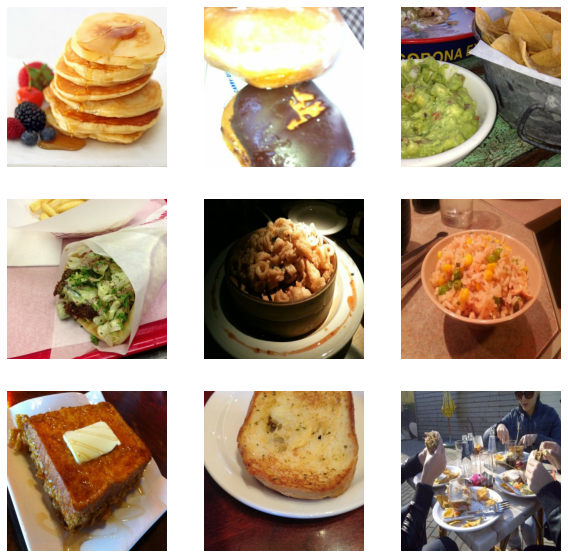

In [ ]:
#Function to see images in the train directory
data = tf.keras.preprocessing.image_dataset_from_directory(download_dir/'food-101/train')


def show_img(data):
    plt.figure(figsize=(10,10))
    for images, labels in data.take(1):
        for i in range(9): 
            ax = plt.subplot(3, 3, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"))
            ax.axis("off")

#Plotting the images in dataset
show_img(data)

Food 0 gnocchi
Food 1 beignets
Food 2 ravioli
Food 3 sushi
Food 4 peking_duck
Food 5 tacos
Food 6 ice_cream
Food 7 hamburger
Food 8 seaweed_salad
Food 9 beet_salad
Food 10 lobster_roll_sandwich
Food 11 macaroni_and_cheese
Food 12 bibimbap
Food 13 fried_calamari
Food 14 scallops
Food 15 waffles
Food 16 french_onion_soup
Food 17 club_sandwich
Food 18 cheese_plate
Food 19 french_fries
Food 20 oysters
Food 21 pho
Food 22 spaghetti_carbonara
Food 23 french_toast
Food 24 chocolate_mousse
Food 25 croque_madame
Food 26 chicken_curry
Food 27 edamame
Food 28 sashimi
Food 29 guacamole
Food 30 beef_carpaccio
Food 31 fish_and_chips
Food 32 shrimp_and_grits
Food 33 paella
Food 34 breakfast_burrito
Food 35 baby_back_ribs
Food 36 cannoli
Food 37 nachos
Food 38 hummus
Food 39 escargots
Food 40 omelette
Food 41 red_velvet_cake
Food 42 steak
Food 43 caprese_salad
Food 44 spring_rolls
Food 45 beef_tartare
Food 46 deviled_eggs
Food 47 bruschetta
Food 48 baklava
Food 49 onion_rings
Food 50 strawberry_shortc

<BarContainer object of 101 artists>

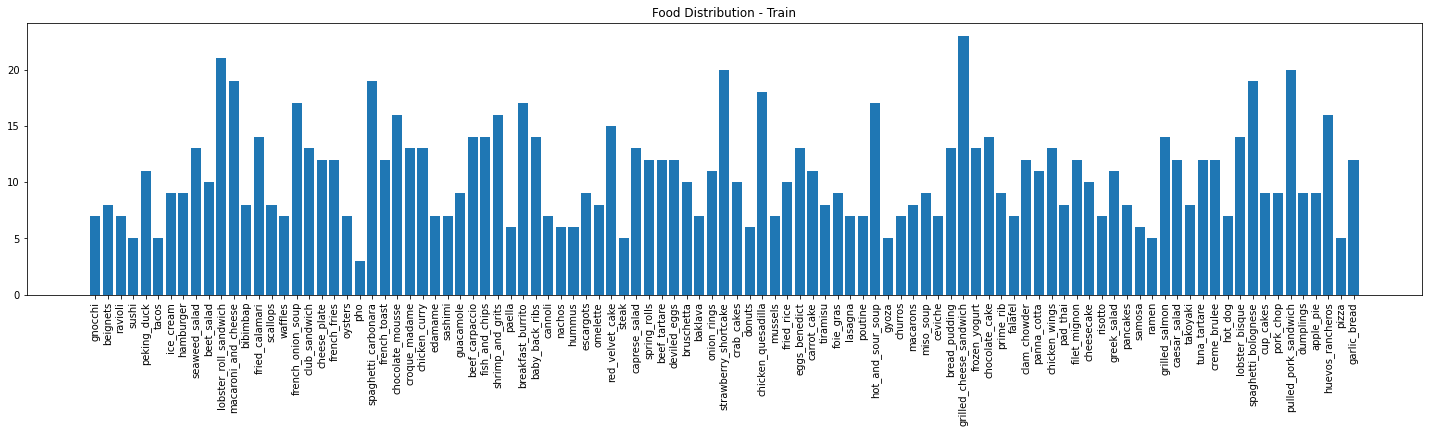

In [ ]:
#Distribution of images per class on the training data
label_names = os.listdir(download_dir/'food-101/train')

temp_plot=[]

n_labels = len(label_names)

for i in range(len(label_names)):
    print("Food",i,label_names[i])
    temp_plot.append([label_names[i],len(os.listdir(download_dir/'food-101/train')[i])])

plt.figure(figsize=(25,5)) 
plt.title("Food Distribution - Train")
plt.xticks(rotation = 90)
plt.bar(x=pd.DataFrame(temp_plot)[[0,1]][0],height=pd.DataFrame(temp_plot)[[0,1]][1])

In [ ]:
#We will consieder 30 classes of food to build and train the model (from the total of 101)
class_subset = sorted(os.listdir(download_dir/'food-101/images'))[:10]

Food 0 gnocchi
Food 1 beignets
Food 2 ravioli
Food 3 sushi
Food 4 peking_duck
Food 5 tacos
Food 6 ice_cream
Food 7 hamburger
Food 8 seaweed_salad
Food 9 beet_salad
Food 10 lobster_roll_sandwich
Food 11 macaroni_and_cheese
Food 12 bibimbap
Food 13 fried_calamari
Food 14 scallops
Food 15 waffles
Food 16 french_onion_soup
Food 17 club_sandwich
Food 18 cheese_plate
Food 19 french_fries
Food 20 oysters
Food 21 pho
Food 22 spaghetti_carbonara
Food 23 french_toast
Food 24 chocolate_mousse
Food 25 croque_madame
Food 26 chicken_curry
Food 27 edamame
Food 28 sashimi
Food 29 guacamole
Food 30 beef_carpaccio
Food 31 fish_and_chips
Food 32 shrimp_and_grits
Food 33 paella
Food 34 breakfast_burrito
Food 35 baby_back_ribs
Food 36 cannoli
Food 37 nachos
Food 38 hummus
Food 39 escargots
Food 40 omelette
Food 41 red_velvet_cake
Food 42 steak
Food 43 caprese_salad
Food 44 spring_rolls
Food 45 beef_tartare
Food 46 deviled_eggs
Food 47 bruschetta
Food 48 baklava
Food 49 onion_rings
Food 50 strawberry_shortc

<BarContainer object of 101 artists>

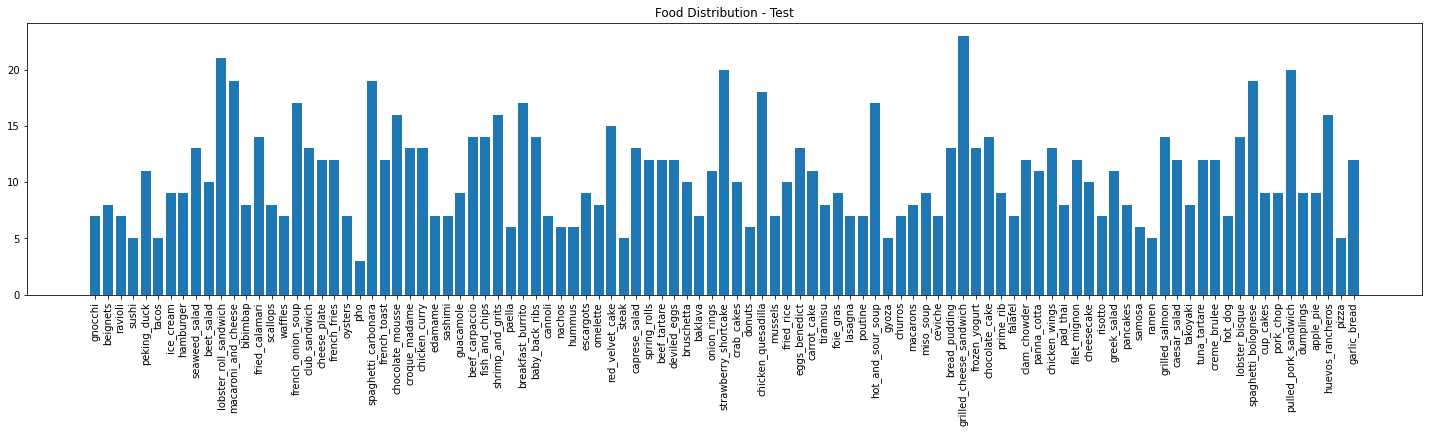

In [ ]:
#Distribution of images per class on the test data
label_names = os.listdir(download_dir/'food-101/test')

temp_plot=[]

n_labels = len(label_names)

for i in range(len(label_names)):
    print("Food",i,label_names[i])
    temp_plot.append([label_names[i],len(os.listdir(download_dir/'food-101/test')[i])])

plt.figure(figsize=(25,5)) 
plt.title("Food Distribution - Test")
plt.xticks(rotation = 90)
plt.bar(x=pd.DataFrame(temp_plot)[[0,1]][0],height=pd.DataFrame(temp_plot)[[0,1]][1])

### **2.1 Data augmentation:**

In [ ]:
train_generator = ImageDataGenerator(
    rescale=1/255.,              # normalize pixel values between 0-1
    brightness_range=[0.4, 0.9], # specify the range in which to decrease/increase brightness
    width_shift_range=0.5,       # shift the width of the image 50%
    rotation_range=90,           # random rotation by 90 degrees
    horizontal_flip=True,        # 180 degree flip horizontally
    vertical_flip=True,          # 180 degree flip vertically
    validation_split=0.15        # 15% of the data will be used for validation at the end of each epoch
)

In [ ]:
batch_size = 64

# divide the data in the train directory in train and validation
traingen = train_generator.flow_from_directory(download_dir/'food-101/train',
                                               target_size=(299, 299),
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='training',
                                               shuffle=True)

validgen = train_generator.flow_from_directory(download_dir/'food-101/train',
                                               target_size=(299, 299),
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='validation',
                                               shuffle=True)

Found 6380 images belonging to 10 classes.
Found 1120 images belonging to 10 classes.


In [ ]:
#Check the chosen 10 food classes
print("Classes:", traingen.class_indices)
print("Classes:", validgen.class_indices)

Classes: {'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9}
Classes: {'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9}


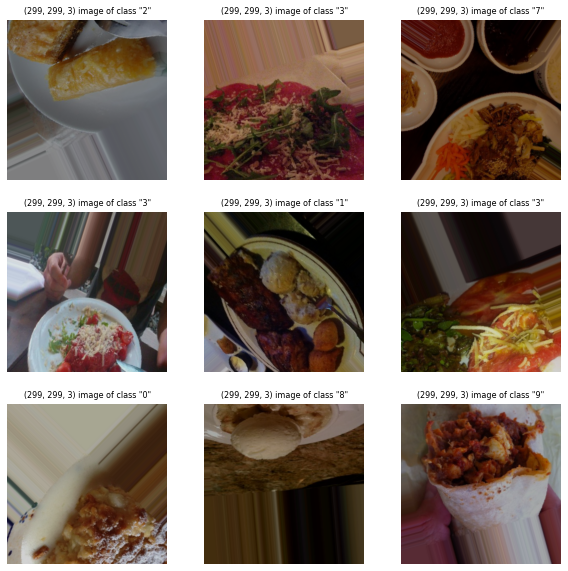

In [ ]:
#check some examples of images in the train dataset -- rever legenda + escuro
def show_sample_batch(ds, grid_size=(3, 3)):
    n_images = grid_size[0]*grid_size[1]
    # Get a batch via iteration
    batch_x, batch_y = traingen.next()
    batch_x, batch_y = batch_x[0:n_images], batch_y[0:n_images]
    # Plot the images
    plt.figure(figsize=(10, 10))
    for i, (img, y) in enumerate(zip(batch_x, batch_y)):
        ax = plt.subplot(grid_size[0], grid_size[1],  i + 1)
        plt.imshow(img)
        plt.title("{} image of class \"{}\"".format(img.shape,np.argmax(y,axis=-1)), size=8)
        plt.axis("off")

show_sample_batch(traingen)

In [ ]:
## generate the test dataset
test_generator = ImageDataGenerator(rescale=1/255)

testgen = test_generator.flow_from_directory(download_dir/'food-101/test',
                                             classes=class_subset, 
                                             target_size=(299, 299), # TARGET SIZE FOR INCEPTION V3 - 299X299
                                             shuffle=False)

Found 2500 images belonging to 10 classes.


# 3. Model Creation and Tuning

In [ ]:
## define parameters
input_shape = (299, 299, 3) # for this model we have changed input size, as 299x299 is the standard for Invception V3

# We will use a Scheduler to test several learning rates
lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9)

# Optimizers -- both Adam and SGD were tested
optim_1 = Adam(learning_rate=lr_schedule) 

optim_2 = SGD(learning_rate=lr_schedule)

# Number of classes, steps and epochs
n_classes= 10
n_steps = len(traingen) // batch_size
n_epochs = 50

In [ ]:
## Callback Plot Losses
plot_loss_1 = PlotLossesCallback()

In [ ]:
# ModelCheckpoint callback - save best weights
tl_checkpoint_0 = ModelCheckpoint(filepath='cnn_model.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

tl_checkpoint_1 = ModelCheckpoint(filepath='cnn2_model.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

tl_checkpoint_2 = ModelCheckpoint(filepath='vgg16_model.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

tl_checkpoint_3 = ModelCheckpoint(filepath='InceptionV3_model.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

In [ ]:
# Callback Early Stop
patience = 5
early_stop = EarlyStopping(patience=patience, monitor='val_loss', mode='min', restore_best_weights=True)

### **3.1 InceptionV3:**

### 3.1.1 Function to create the model:

In [ ]:
#load pre-trained InceptionV3
InceptionV3_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape, pooling='avg')

for layer in InceptionV3_model.layers:
    layer.trainable = False

In [ ]:
#create the model
x = InceptionV3_model.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x) # applies a transformation that maintains tensors' mean and standard deviation constant across the network
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x) # creates a fully-connected layer mapping from the number of elements that are given as input to the layer (defined implicitly)
x = Dropout(0.2)(x)
predictions = Dense(n_classes, activation='softmax')(x) # the "softmax" function is used at the end of multi-class classification models

InceptionV3_model = Model(inputs = InceptionV3_model.input, outputs = predictions)
InceptionV3_model.compile(optimizer = optim_1, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
InceptionV3_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_190 (Batch  (None, 149, 149, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

### 3.1.2 Training of the model:

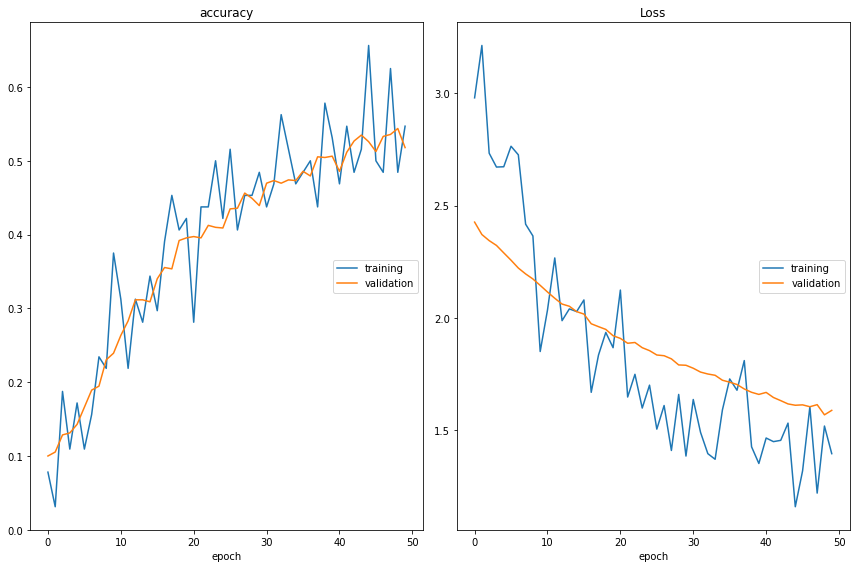

accuracy
	training         	 (min:    0.031, max:    0.656, cur:    0.547)
	validation       	 (min:    0.100, max:    0.544, cur:    0.518)
Loss
	training         	 (min:    1.159, max:    3.213, cur:    1.396)
	validation       	 (min:    1.569, max:    2.427, cur:    1.588)
1/1 [==============================] - 263s 263s/step - loss: 1.3956 - accuracy: 0.5469 - val_loss: 1.5884 - val_accuracy: 0.5179


In [51]:
Inception_V3 = InceptionV3_model.fit(traingen,
                            epochs=n_epochs,
                            validation_data=validgen,
                            steps_per_epoch=n_steps,
                            callbacks=[tl_checkpoint_3, plot_loss_1, early_stop],
                            verbose=1)

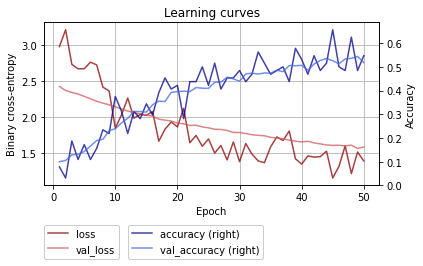

In [52]:
# Create DataFrame object
df_Inception_V3 = pd.DataFrame.from_dict(Inception_V3.history)
df_Inception_V3["Epoch"] = np.arange(1, len(df_Inception_V3) + 1, 1)
# Plot learning curves
secondary_y = ["accuracy", "val_accuracy"] 
ax = df_Inception_V3.plot(x="Epoch", y=['loss', 'val_loss'] + secondary_y,
                  secondary_y = secondary_y,
                  kind="line", figsize=(6, 3), grid=True, legend=True,
                  ylabel="Binary cross-entropy", 
                  xlabel="Epoch", title="Learning curves",                  
                  color=['darkred', 'indianred', "darkblue", "royalblue"], alpha=0.75, fontsize=10)
ax.right_ax.set_ylabel("Accuracy")
ax.right_ax.legend(loc=(0.25, -0.45), framealpha=1.0)
ax.legend(loc=(0, -0.45), framealpha=1.0)
plt.show()

In [53]:
InceptionV3_model.load_weights('InceptionV3_model.weights.best.hdf5')

### 3.1.3 Applying the model on unseen data:

In [54]:
true_classes = testgen.classes

In [55]:
# Inception V3 -- test5
InceptionV3_preds = np.argmax(InceptionV3_model.predict(testgen), axis=-1)
InceptionV3_pred_classes = np.argmax(InceptionV3_preds, axis=-1)

InceptionV3_acc = accuracy_score(true_classes, InceptionV3_preds)

print("The Inception V3 Model Accuracy in the test dataset: {:.2f}%".format(InceptionV3_acc * 100))

79/79 [==============================] - 501s 6s/step
The Inception V3 Model Accuracy in the test dataset: 65.52%
